# Wine Qaulity Test

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("WineQuality.csv")

In [3]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1439,7.300000,0.67000,0.020000,2.200000,0.072000,31.000000,92.000000,0.995660,3.320000,0.680000,11.066667,6.000000
1574,5.600000,0.31000,0.780000,13.900000,0.074000,23.000000,92.000000,0.996770,3.390000,0.480000,10.500000,6.000000
1637,8.133287,0.34245,0.163124,0.900000,0.179937,16.243784,23.450095,0.997151,3.293771,0.620693,11.077481,6.247763
1648,9.765332,0.37453,0.284917,1.865343,0.110010,19.365080,80.598005,0.995784,3.269448,0.492242,9.949514,5.940719
715,7.200000,0.49000,0.180000,2.700000,0.069000,13.000000,34.000000,0.996700,3.290000,0.480000,9.200000,6.000000


In [4]:
df.shape

(1699, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1699 non-null   float64
 1   volatile acidity      1699 non-null   float64
 2   citric acid           1699 non-null   float64
 3   residual sugar        1699 non-null   float64
 4   chlorides             1699 non-null   float64
 5   free sulfur dioxide   1699 non-null   float64
 6   total sulfur dioxide  1699 non-null   float64
 7   density               1699 non-null   float64
 8   pH                    1699 non-null   float64
 9   sulphates             1699 non-null   float64
 10  alcohol               1699 non-null   float64
 11  quality               1699 non-null   float64
dtypes: float64(12)
memory usage: 159.4 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000
mean,8.329397,0.526786,0.271403,2.549096,0.087544,16.048253,46.897874,0.996747,3.311263,0.657206,10.421607,5.638028
std,1.726301,0.178695,0.194009,1.399910,0.046900,10.490591,32.733365,0.001887,0.154309,0.169189,1.066080,0.809308
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.094784,1.900000,0.070000,8.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.091000,22.000000,63.000000,0.997860,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df['quality'].unique()

array([5.        , 6.        , 7.        , 4.        , 8.        ,
       3.        , 5.2599134 , 4.48543942, 4.65010649, 6.48972212,
       6.42384295, 6.87809384, 5.21748332, 4.45413257, 5.77700622,
       6.24326065, 5.69139188, 5.78512718, 5.05913414, 7.16781456,
       7.832748  , 6.32762401, 6.48704085, 6.24894286, 4.76566877,
       6.32442162, 6.37725977, 4.80875836, 6.00920316, 6.11112951,
       6.14449153, 6.52336112, 7.32577053, 5.51726347, 4.49939778,
       4.96797608, 6.03819072, 5.21143883, 5.2571306 , 5.52104119,
       5.69054838, 3.98920093, 5.56405189, 4.99572265, 6.24776259,
       6.540157  , 6.83118017, 6.09065927, 6.24605338, 5.67485445,
       5.17014227, 5.51030234, 5.37273587, 3.85037721, 4.94971417,
       5.94071886, 5.59113403, 6.72254263, 4.29961084, 5.59217564,
       5.51944146, 3.96161593, 6.03122645, 5.38604227, 7.05314067,
       5.59003497, 4.84591856, 5.65709285, 7.76185382, 7.06606699,
       6.13725833, 5.80374474, 5.26270312, 4.43632936, 5.21377

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.iloc [:,:-1]
y = df['quality']

In [11]:
X.shape, y.shape

((1699, 11), (1699,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
mse = mean_squared_error(y_test, y_pred)

In [19]:
r2 = r2_score(y_pred, y_test)

In [20]:
mse

0.43778513047378825

In [21]:
r2

-1.041596198909044

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [24]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
y_pred_rf = rf.predict(X_test)

In [26]:
mse_rf = mean_squared_error(y_test, y_pred_rf)

In [27]:
mse

0.43778513047378825

In [28]:
r2_rf = r2_score(y_pred_rf, y_test)

In [29]:
r2_rf

-0.3022568320545014

# Feature Engg

In [30]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
173,7.4,0.62,0.05,1.9,0.068,24.0,42.0,0.99610,3.42,0.57,11.5,6.0
836,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7.0
246,7.1,0.68,0.07,1.9,0.075,16.0,51.0,0.99685,3.38,0.52,9.5,5.0
331,10.2,0.36,0.64,2.9,0.122,10.0,41.0,0.99800,3.23,0.66,12.5,6.0
799,9.4,0.50,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7,6.0


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

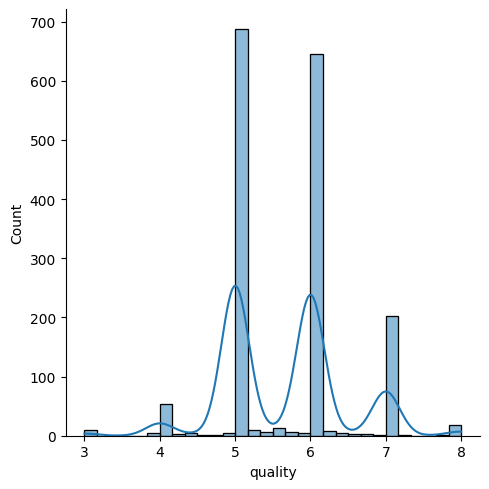

In [39]:
sns.displot(df["quality"], kde=True)

In [42]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.246230,0.638100,0.111315,0.095758,-0.141559,-0.107506,0.635349,-0.643076,0.163341,-0.059039,0.115421
volatile acidity,-0.246230,1.000000,-0.523358,0.004541,0.064198,-0.017728,0.075823,0.025644,0.229109,-0.246476,-0.192472,-0.376788
citric acid,0.638100,-0.523358,1.000000,0.140037,0.197980,-0.054019,0.041330,0.333795,-0.518344,0.301228,0.098515,0.217785
residual sugar,0.111315,0.004541,0.140037,1.000000,0.058636,0.175662,0.200397,0.339175,-0.082586,0.007583,0.041120,0.005021
chlorides,0.095758,0.064198,0.197980,0.058636,1.000000,0.004189,0.044096,0.191737,-0.258201,0.346504,-0.211507,-0.127046
free sulfur dioxide,-0.141559,-0.017728,-0.054019,0.175662,0.004189,1.000000,0.634319,-0.017255,0.064774,0.043891,-0.066393,-0.044434
total sulfur dioxide,-0.107506,0.075823,0.041330,0.200397,0.044096,0.634319,1.000000,0.062363,-0.067295,0.035212,-0.190892,-0.166649
density,0.635349,0.025644,0.333795,0.339175,0.191737,-0.017255,0.062363,1.000000,-0.329039,0.131199,-0.459462,-0.177091
pH,-0.643076,0.229109,-0.518344,-0.082586,-0.258201,0.064774,-0.067295,-0.329039,1.000000,-0.195561,0.198079,-0.052872
sulphates,0.163341,-0.246476,0.301228,0.007583,0.346504,0.043891,0.035212,0.131199,-0.195561,1.000000,0.089477,0.239841


In [44]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()

In [49]:
sc.fit(X_train)

StandardScaler()

In [50]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [51]:
lr.fit(X_train_sc, y_train)

LinearRegression()

In [53]:
y_pred_sc = lr.predict(X_test_sc)

In [54]:
mse_sc_lr = mean_squared_error(y_test, y_pred_sc)

In [55]:
mse_sc_lr

0.4377851304737869

In [56]:
r2_score(y_test, y_pred_sc)

0.2935742166731494

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
mm = MinMaxScaler()

In [59]:
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

In [60]:
lr.fit(X_train_mm, y_train)

LinearRegression()

In [61]:
y_pred_mm_lr = lr.predict(X_test_mm)

In [63]:
mean_squared_error(y_pred_mm_lr, y_test)

0.43778513047378703

In [64]:
r2_score(y_pred_mm_lr, y_test)

-1.0415961989091445

In [65]:
rf.fit(X_train_sc, y_train)

RandomForestRegressor(random_state=42)

In [67]:
y_pred_sc_rf = rf.predict(X_test_sc)

In [71]:
mean_squared_error(y_test, y_pred_sc_rf)

0.36044916123811244

In [72]:
r2_score(y_test, y_pred_sc_rf)

0.41836630951451137

In [80]:
from xgboost import XGBRegressor


In [84]:
xgb = xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

In [85]:
xgb.fit(X_train_sc, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [86]:
y_pred_sc_xgb = xgb.predict(X_test_sc)

In [87]:
mean_squared_error(y_pred_sc_xgb, y_test)

0.3783718435296996

In [88]:
r2_score(y_pred_sc_xgb, y_test)

-0.24139151281140792

In [90]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [91]:
y_pred_xgb = xgb.predict(X_test)

In [95]:
mean_squared_error(y_test, y_pred_xgb)

0.3783718435296996

In [97]:
r2_score(y_test, y_pred_xgb)

0.38944562675068506

In [99]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_xgb)
mae

0.47022369090960575

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
cv_r2 = cross_val_score(xgb, X, y, cv = 5 , scoring="r2")

In [104]:
cv_r2.mean()

np.float64(0.2662426310817704)

In [106]:
xgb.feature_importances_

array([0.03566821, 0.1029232 , 0.05440857, 0.05186851, 0.06084545,
       0.05875475, 0.07146501, 0.05310328, 0.07464956, 0.1158803 ,
       0.32043314], dtype=float32)

In [107]:
imp = pd.Series(
    xgb.feature_importances_,
    index = X.columns
).sort_values()

In [108]:
imp

fixed acidity           0.035668
residual sugar          0.051869
density                 0.053103
citric acid             0.054409
free sulfur dioxide     0.058755
chlorides               0.060845
total sulfur dioxide    0.071465
pH                      0.074650
volatile acidity        0.102923
sulphates               0.115880
alcohol                 0.320433
dtype: float32

In [109]:
low_feature = imp.index[:4]

In [111]:
low_feature

Index(['fixed acidity', 'residual sugar', 'density', 'citric acid'], dtype='object')

In [112]:
X_reduced = X.drop(columns = low_feature)

In [113]:
X_reduced

,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.700000,0.076000,11.000000,34.000000,3.510000,0.560000,9.400000
1,0.880000,0.098000,25.000000,67.000000,3.200000,0.680000,9.800000
2,0.760000,0.092000,15.000000,54.000000,3.260000,0.650000,9.800000
3,0.280000,0.075000,17.000000,60.000000,3.160000,0.580000,9.800000
4,0.700000,0.076000,11.000000,34.000000,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...
1694,0.774154,0.079321,16.037881,10.405468,3.557283,0.514583,9.366488
1695,0.290908,0.055079,39.435754,78.763287,2.925239,1.046480,8.942161
1696,0.964682,0.115459,24.801783,71.432995,3.327200,0.647539,9.619507
1697,0.510212,0.095933,30.435484,76.676115,3.158328,0.817616,9.375978


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2, random_state = 42)

In [119]:
xgb_reduced = XGBRegressor(
    n_estimators = 500,
    max_depth = 3,
    learning_rate = 0.05,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 42
)

In [120]:
xgb_reduced.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [121]:
cv_r2_reduced = cross_val_score(xgb_reduced, X_reduced,y, cv =5, scoring = "r2").mean()


In [122]:
cv_r2_reduced

np.float64(0.2641720492382989)

In [124]:
xgb_reduced.feature_importances_

array([0.14635298, 0.0955165 , 0.07718855, 0.12043712, 0.09658519,
       0.17026761, 0.29365212], dtype=float32)

In [127]:
imp_2 = pd.Series(
    xgb_reduced.feature_importances_,
    index = X_reduced.columns
).sort_values()

In [128]:
imp_2

free sulfur dioxide     0.077189
chlorides               0.095516
pH                      0.096585
total sulfur dioxide    0.120437
volatile acidity        0.146353
sulphates               0.170268
alcohol                 0.293652
dtype: float32

In [129]:
low_feature_2 = imp_2.index[:3]

In [130]:
low_feature_2

Index(['free sulfur dioxide', 'chlorides', 'pH'], dtype='object')

In [140]:
X_reduced_2 = X_reduced.drop(columns=low_feature_2)

In [141]:
X_reduced_2

,volatile acidity,total sulfur dioxide,sulphates,alcohol
0,0.700000,34.000000,0.560000,9.400000
1,0.880000,67.000000,0.680000,9.800000
2,0.760000,54.000000,0.650000,9.800000
3,0.280000,60.000000,0.580000,9.800000
4,0.700000,34.000000,0.560000,9.400000
...,...,...,...,...
1694,0.774154,10.405468,0.514583,9.366488
1695,0.290908,78.763287,1.046480,8.942161
1696,0.964682,71.432995,0.647539,9.619507
1697,0.510212,76.676115,0.817616,9.375978


In [142]:
xgb_reduced_2 = XGBRegressor(
    n_estimators = 500,
    max_depth = 3,
    learning_rate = 0.05,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 42
)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced_2, y, test_size = 0.2, random_state=42)

In [144]:
xgb_reduced_2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [146]:
cv_r2_reduced_2 = cross_val_score(xgb_reduced_2, X_reduced_2,y,  scoring = "r2", cv = 5).mean()

In [147]:
cv_r2_reduced_2

np.float64(0.25090622949121477)

In [148]:
xgb_reduced_2.feature_importances_

array([0.20931901, 0.15800223, 0.22854705, 0.4041317 ], dtype=float32)

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
rf = RandomForestRegressor()

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2, random_state= 42)

In [152]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [153]:
y_pred_reduced_rf = rf.predict(X_test)

In [154]:
mean_squared_error(y_test, y_pred_reduced_rf)

0.3516075893338217

In [155]:
mean_absolute_error(y_test, y_pred_reduced_rf)

0.43398011691351795

In [156]:
r2_score(y_test, y_pred_reduced_rf)

0.4194066679787173

In [158]:
cv_r2_rf = cross_val_score(rf, X_reduced, y, cv = 5, scoring = "r2").mean()
cv_r2_rf

np.float64(0.2849406100502455)

In [159]:
rf.feature_names_in_

array(['volatile acidity', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol'], dtype=object)

In [160]:
rf.feature_importances_

array([0.15977448, 0.10449843, 0.06972062, 0.11241184, 0.10709495,
       0.14393174, 0.30256794])